In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'd:\workspace\water.csv')

In [8]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'Correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

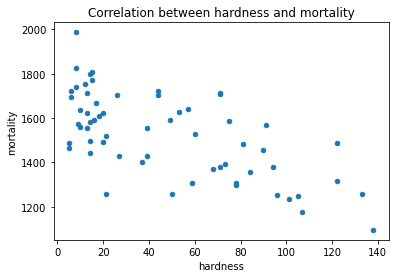

In [19]:
# Точечный график

data.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality')

In [11]:
# Расчет коэффициента корреляции по методу Спирмена

data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [34]:
# Расчет корреляции по методу Пирсона

data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Построение модели линейной регрессии

In [19]:
X = data[['hardness']]
y = data['mortality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

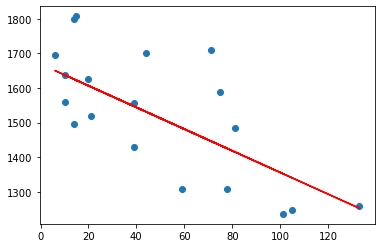

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [32]:
#Коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

### График остатков

In [42]:
residual = (y_test - y_pred)

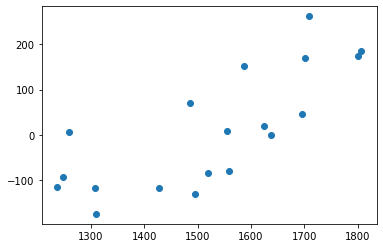

In [44]:
plt.scatter(y_test, residual)

### Вывод: при изучении набора данных о северных и южных городах усматривается зависимость смертности населения от жесткости воды

## Северные города

In [11]:
n_town = data[data['location'] == "North"]

<AxesSubplot:title={'center':'Correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

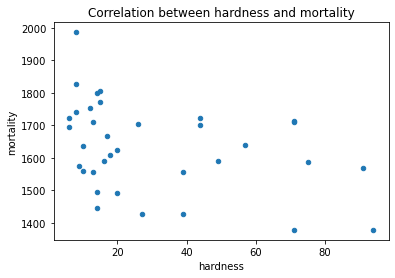

In [12]:
n_town.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality')

In [14]:
n_town[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [13]:
n_town[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [21]:
X = n_town[['hardness']]
y = n_town['mortality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

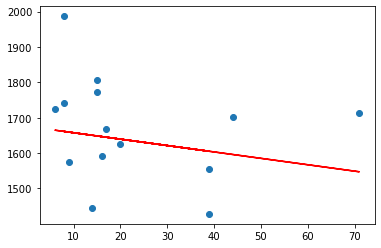

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [35]:
#Коэффициент детерминации
model.score(X_test, y_test)

-0.007286452033987922

### График остатков

In [36]:
residual = (y_test - y_pred)

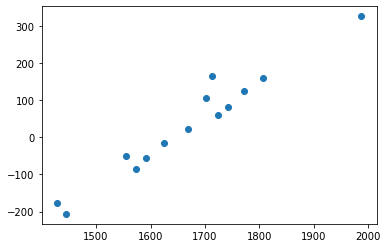

In [37]:
plt.scatter(y_test, residual)

### Вывод: при изучении набора данных о северных городах выявлены низкие коэффициенты корреляции, а также низкий коэффициент детерминации построенной регрессионной модели, а при анализе остатков усматривется их систематичность, в связи с чем можно сделать вывод об отсутствии линйной зависимости смертности населения от жесткости воды

## Южные города

In [38]:
s_town = data[data['location'] == "South"]

<AxesSubplot:title={'center':'Correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

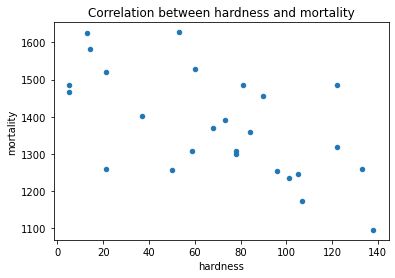

In [40]:
s_town.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality')

In [41]:
s_town[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [42]:
s_town[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [43]:
X = s_town[['hardness']]
y = s_town['mortality']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

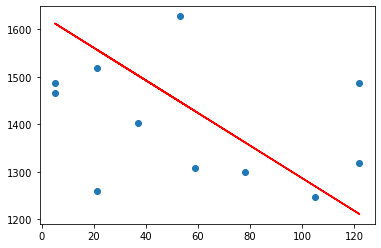

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [49]:
#Коэффициент детерминации
model.score(X_test, y_test)

-0.7912771733269186

### График остатков

In [50]:
residual = (y_test - y_pred)

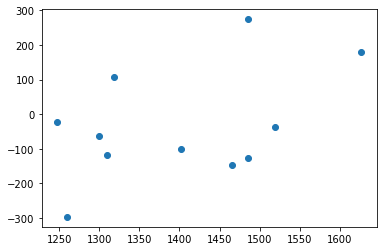

In [51]:
plt.scatter(y_test, residual)

### Вывод: при изучении набора данных о южных городах выявлены достаточно высокие коэффициенты корреляции и детерминации построенной регрессионной модели, а при анализе усматривется хаотичность их распределения, в связи с чем можно сделать вывод о наличии зависимости смертности населения от жесткости воды